# **Proyecto Final NLP - Notebook 3**


## _Modelo Recurrentes con Embeddings a nivel de Caracter_

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

## Cargamos Datos

In [ ]:
!mkdir data
!mkdir models

In [ ]:
df = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [ ]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910


## Canonical_smiles To secuence

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [ ]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [ ]:
X = df['canonical_smiles']
y = df['pIC50']

## Armamos el tokenizer

In [ ]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado
token=Tokenizer(num_words=None, 
                filters=None, 
                lower=False, 
                split=' ', 
                char_level=True, #Trabajamos a nivel de caracter
                oov_token=None, #"UNK" 
                document_count=0)

token.fit_on_texts(X)

In [ ]:
token.document_count

5103

In [ ]:
print(token.num_words)

None


In [ ]:
token.index_word

{1: 'c',
 2: 'C',
 3: '(',
 4: ')',
 5: '1',
 6: 'O',
 7: '2',
 8: 'N',
 9: '=',
 10: '3',
 11: '[',
 12: ']',
 13: '@',
 14: 'n',
 15: '4',
 16: 'H',
 17: '-',
 18: '/',
 19: 'l',
 20: '.',
 21: '+',
 22: 'F',
 23: '5',
 24: 'o',
 25: 'B',
 26: 'r',
 27: 'S',
 28: '\\',
 29: '#',
 30: '6',
 31: 's',
 32: 'I',
 33: 'e',
 34: 'P',
 35: '7',
 36: '8',
 37: 'i',
 38: 'a'}

## Armamos el Pad Sequences

In [ ]:
# sequences = list of sequences (a sequence is a list of integer word indices).
sequences = token.texts_to_sequences(X)
X_seq_pad = pad_sequences(sequences)

In [ ]:
print(sequences) 

[[2, 2, 6, 1, 5, 14, 14, 3, 17, 1, 7, 1, 1, 1, 1, 3, 6, 2, 1, 10, 1, 1, 1, 1, 1, 10, 4, 1, 7, 4, 1, 3, 9, 6, 4, 24, 5], [6, 9, 2, 3, 8, 5, 2, 2, 2, 2, 2, 5, 4, 14, 5, 14, 1, 3, 17, 1, 7, 1, 1, 1, 3, 2, 19, 4, 1, 1, 7, 4, 14, 1, 5, 27, 2, 2, 5, 2, 2, 5], [2, 8, 3, 2, 3, 9, 6, 4, 14, 5, 14, 1, 3, 17, 1, 7, 1, 1, 1, 3, 2, 19, 4, 1, 1, 7, 4, 14, 1, 5, 27, 2, 2, 3, 22, 4, 3, 22, 4, 22, 4, 1, 5, 1, 1, 1, 1, 1, 5], [6, 9, 2, 3, 8, 5, 2, 2, 2, 2, 2, 5, 4, 14, 5, 14, 1, 3, 17, 1, 7, 1, 1, 1, 3, 2, 19, 4, 1, 1, 7, 4, 14, 1, 5, 27, 2, 2, 3, 22, 4, 3, 22, 4, 22], [2, 27, 1, 5, 14, 1, 3, 17, 1, 7, 1, 1, 1, 3, 6, 2, 3, 22, 4, 3, 22, 4, 22, 4, 1, 1, 7, 4, 14, 14, 5, 2, 3, 9, 6, 4, 8, 3, 2, 4, 2], [2, 27, 1, 5, 14, 1, 3, 17, 1, 7, 1, 1, 1, 3, 2, 4, 1, 1, 7, 4, 14, 14, 5, 2, 3, 9, 6, 4, 8, 3, 2, 4, 1, 5, 1, 1, 1, 1, 1, 5], [2, 27, 1, 5, 14, 1, 3, 17, 1, 7, 1, 1, 1, 3, 2, 19, 4, 1, 1, 7, 4, 14, 14, 5, 2, 3, 9, 6, 4, 8, 3, 2, 4, 2], [2, 2, 2, 2, 2, 2, 27, 1, 5, 14, 1, 3, 17, 1, 7, 1, 1, 1, 3, 2, 19, 4, 1

In [ ]:
print(sequences[0])

[2, 2, 6, 1, 5, 14, 14, 3, 17, 1, 7, 1, 1, 1, 1, 3, 6, 2, 1, 10, 1, 1, 1, 1, 1, 10, 4, 1, 7, 4, 1, 3, 9, 6, 4, 24, 5]


In [ ]:
print(X_seq_pad.shape)

(5103, 207)


## Distribución de tamaño de los Smiles Tokenizados

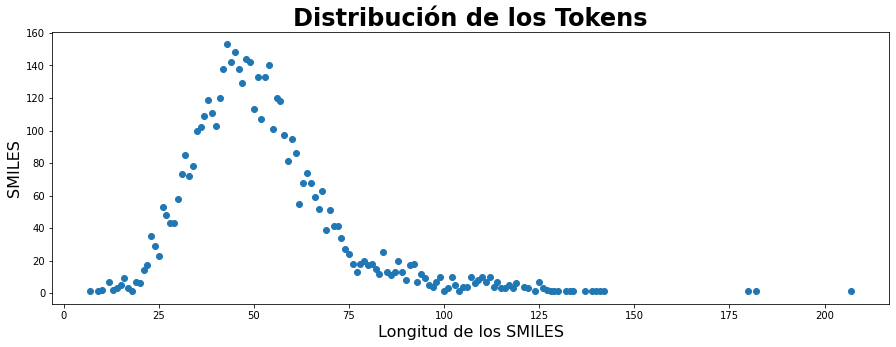

In [ ]:
lengths=[len(seq) for seq in sequences]
lengths=dict(Counter(lengths))
plt.figure(figsize=[15,5])
plt.scatter(list(lengths.keys()), list(lengths.values()))
plt.title(label="Distribución de los Tokens", size='24',fontweight='bold')
plt.xlabel(xlabel="Longitud de los SMILES", size='16')
plt.ylabel(ylabel="SMILES", size='16')
plt.show()

## Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test)


(4082, 4082, 1021)

## Network Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization, GRU, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [ ]:
# Métrica

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
# vocab_size = # Completar largo del vocabulario
vocabulario= token.index_word
vocab_size = len(vocabulario)

In [ ]:
print(vocabulario)

{1: 'c', 2: 'C', 3: '(', 4: ')', 5: '1', 6: 'O', 7: '2', 8: 'N', 9: '=', 10: '3', 11: '[', 12: ']', 13: '@', 14: 'n', 15: '4', 16: 'H', 17: '-', 18: '/', 19: 'l', 20: '.', 21: '+', 22: 'F', 23: '5', 24: 'o', 25: 'B', 26: 'r', 27: 'S', 28: '\\', 29: '#', 30: '6', 31: 's', 32: 'I', 33: 'e', 34: 'P', 35: '7', 36: '8', 37: 'i', 38: 'a'}


In [ ]:
print(vocab_size)

38


In [ ]:
print(X_seq_pad.shape[0])
print(X_seq_pad.shape[1])

5103
207


In [ ]:
max_sequence_len = X_seq_pad.shape[1]

In [ ]:
print(max_sequence_len)

207


# Armar modelo en keras de LSTM
_El de abajo es un ejemplo propuesto pero puede armar otro similar (siempre con LSTM o GRU)_

## A tener en cuanta:
+ `vocab_size` = 38 +1 por que va desde [0,38) por lo tanto se debe sumar 1
+ `max_sequence_len`= 207

In [ ]:
#Armamos modelo
model = Sequential()
model.add(Embedding(input_dim=vocab_size + 1, output_dim=64, input_length=max_sequence_len))
model.add(Bidirectional(LSTM(300, return_sequences=False, activation='tanh')))
model.add(Dense(150))
#model.add(BatchNormalization())
#model.Dropout(0.2)
model.add(Activation('relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 207, 64)           2496      
                                                                 
 bidirectional (Bidirectiona  (None, 600)              876000    
 l)                                                              
                                                                 
 dense (Dense)               (None, 150)               90150     
                                                                 
 activation (Activation)     (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 968,797
Trainable params: 968,797
Non-trainable params: 0
__________________________________________________

In [ ]:
# Entrenamos Modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=[R2])
mcp = ModelCheckpoint(filepath='first_model.h5',
                      verbose=1, 
                      save_best_only=True,
                      mode='max',
                      monitor='val_R2', 
                      save_format="h5",
                      )
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=128, 
                    validation_data=(X_test, y_test), 
                    callbacks=[mcp])

In [ ]:
# Obtenemos Predicción
y_pred = model.predict(X_test)
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
print(r2)

#0.6483478625616774

<function matplotlib.pyplot.show>

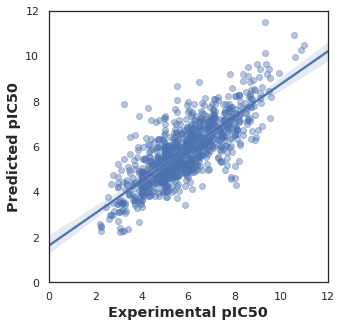

In [ ]:
# Evaluación
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Armamos Segundo Modelo

In [ ]:
#Armamos modelo
model = Sequential()
model.add(Embedding(input_dim=38+1, output_dim=64, input_length=207))
model.add(LSTM(128))
model.add(Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 207, 64)           2496      
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 101,441
Trainable params: 101,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamos Modelo
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=[R2])
mcp = ModelCheckpoint('models/second_model.h5', verbose=1, save_best_only=True, mode='max', monitor='val_R2', save_format="h5")
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[mcp])

In [ ]:
# Obtenemos Predicción
y_pred = model.predict(X_test)
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
print(r2)

0.6071417869857143


<function matplotlib.pyplot.show>

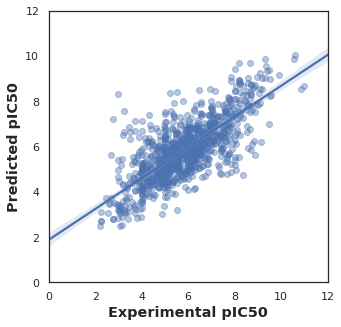

In [ ]:
# Evaluación
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Armamos Tercer Modelo

In [ ]:
#Armamos modelo
model = Sequential()
model.add(Embedding(input_dim=38+1, output_dim=64, input_length=207))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(SimpleRNN(128))
model.add(Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 207, 64)           2496      
                                                                 
 gru (GRU)                   (None, 207, 256)          247296    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               49280     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 299,201
Trainable params: 299,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamos Modelo
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=[R2])
mcp = ModelCheckpoint('models/third_model.h5', verbose=1, save_best_only=True, mode='max', monitor='val_R2', save_format="h5")
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[mcp])

In [ ]:
# Obtenemos Predicción
y_pred = model.predict(X_test)
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
print(r2)

0.5494698915398611


<function matplotlib.pyplot.show>

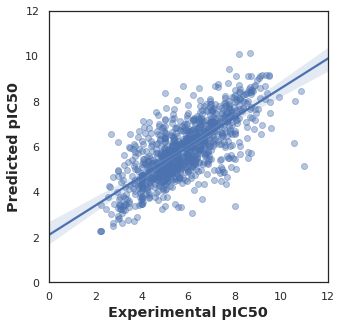

In [ ]:
# Evaluación
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Armamos cuarto Modelo

In [ ]:
#Armamos modelo
model = Sequential()
model.add(Embedding(input_dim=38+1, output_dim=64, input_length=207))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(1))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 207, 64)           2496      
                                                                 
 lstm_14 (LSTM)              (None, 128)               98816     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 101,441
Trainable params: 101,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamos Modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=[R2])
mcp = ModelCheckpoint('models/fourth_model.h5', verbose=1, save_best_only=True, mode='max', monitor='val_R2', save_format="h5")
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[mcp])

Epoch 1/100
128/128 [==============================] - ETA: 0s - loss: 2.6383 - R2: 0.0169
Epoch 00001: val_R2 improved from -inf to 0.04745, saving model to models/fourth_model.h5
128/128 [==============================] - 30s 223ms/step - loss: 2.6383 - R2: 0.0169 - val_loss: 2.6987 - val_R2: 0.0475
Epoch 2/100
128/128 [==============================] - ETA: 0s - loss: 2.6059 - R2: 0.0294
Epoch 00002: val_R2 improved from 0.04745 to 0.06011, saving model to models/fourth_model.h5
128/128 [==============================] - 28s 220ms/step - loss: 2.6059 - R2: 0.0294 - val_loss: 2.6597 - val_R2: 0.0601
Epoch 3/100
128/128 [==============================] - ETA: 0s - loss: 2.5786 - R2: 0.0416
Epoch 00003: val_R2 did not improve from 0.06011
128/128 [==============================] - 28s 221ms/step - loss: 2.5786 - R2: 0.0416 - val_loss: 2.6997 - val_R2: 0.0468
Epoch 4/100
128/128 [==============================] - ETA: 0s - loss: 2.6013 - R2: 0.0244
Epoch 00004: val_R2 improved from 0.06

In [ ]:
# Obtenemos Predicción
y_pred = model.predict(X_test)
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
print(r2)

0.5368809254311482


<function matplotlib.pyplot.show>

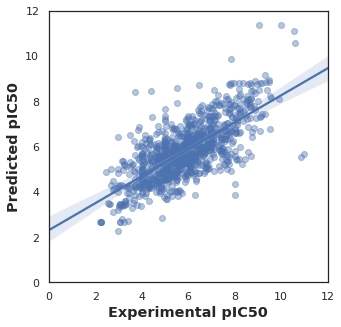

In [ ]:
# Evaluación
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Armamos quinto modelo

In [ ]:
#Armamos modelo
model = Sequential()
model.add(Embedding(input_dim=38 + 1, output_dim=64, input_length=207))
model.add(Bidirectional(LSTM(100, return_sequences=False, activation='tanh', dropout=0.5)))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 207, 64)           2496      
                                                                 
 bidirectional_12 (Bidirecti  (None, 200)              132000    
 onal)                                                           
                                                                 
 dense_36 (Dense)            (None, 10)                2010      
                                                                 
 activation_8 (Activation)   (None, 10)                0         
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 136,517
Trainable params: 136,517
Non-trainable params: 0
_______________________________________________

In [ ]:
#Entrenamos Modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=[R2])
mcp = ModelCheckpoint('models/fifth_model.h5', verbose=1, save_best_only=True, mode='max', monitor='val_R2', save_format="h5")
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[mcp])

Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 13.5432 - R2: -4.0689
Epoch 00001: val_R2 improved from -inf to -0.00890, saving model to models/fifth_model.h5
32/32 [==============================] - 34s 947ms/step - loss: 13.5432 - R2: -4.0689 - val_loss: 2.8953 - val_R2: -0.0089
Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 2.8036 - R2: -0.0152
Epoch 00002: val_R2 improved from -0.00890 to -0.00163, saving model to models/fifth_model.h5
32/32 [==============================] - 29s 922ms/step - loss: 2.8036 - R2: -0.0152 - val_loss: 2.8731 - val_R2: -0.0016
Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 2.7740 - R2: -0.0023
Epoch 00003: val_R2 improved from -0.00163 to 0.00378, saving model to models/fifth_model.h5
32/32 [==============================] - 29s 921ms/step - loss: 2.7740 - R2: -0.0023 - val_loss: 2.8582 - val_R2: 0.0038
Epoch 4/100
32/32 [==============================] - ETA: 0s - loss: 2.7698 - R2: -0.0

In [ ]:
# Obtenemos Predicción
y_pred = model.predict(X_test)
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
print(r2)

0.6205091804281806


<function matplotlib.pyplot.show>

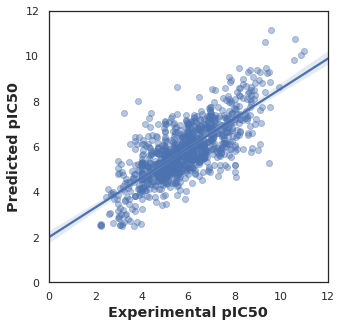

In [ ]:
# Evaluación
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# **Load model** - _Score de la mejor Predicción_

In [ ]:
from tensorflow.keras.models import load_model
model_loaded = load_model('first_model.h5', custom_objects={'R2': R2})
y_pred = model_loaded.predict(X_test)
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
print(r2)

0.6551762332411999


In [ ]:
from tensorflow.keras.models import load_model
model_loaded = load_model('models/fifth_model_0.6205.h5', custom_objects={'R2': R2})
y_pred = model_loaded.predict(X_test)
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
print(r2)

0.619622844007341


¿Hasta que valores de r2 logró?

* El valor máximo que logré de R2 fué de ``0.6551``, y el segundo valor máximo me da un **_Score_** de `0.6196`

+ El primero lo logré con una Bidireccional +LSTM de 300 unidades, return_sequences=False, ya que probé con return_sequences=True y no performó adecuadamente, al principio usé BatchNormalization y no performó bien, Con dropout mejoró un poco pero sin Dropout performó muchisimo mejor, tambien utilicé el optimizador Adam con un Learning rate de 0,001, lo que le dió dinamismo y velocidad a los 100 epochs que iteré.

# Bibliografia

* Tokenizer:

[machinelearningknowledge.ai](https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/)

[machinelearningmastery.com](https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/)

[tensorflow.org](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

[stackoverflow.com](https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do)

* LSTM:

[keras.io](https://keras.io/examples/)

[tensorflow.org](https://www.tensorflow.org/guide/keras/rnn)

[towardsdatascience.com](https://towardsdatascience.com/machine-learning-recurrent-neural-networks-and-long-short-term-memory-lstm-python-keras-example-86001ceaaebc)

[machinelearningknowledge.ai](https://machinelearningknowledge.ai/keras-lstm-layer-explained-for-beginners-with-example/)

[adventuresinmachinelearning.com](https://adventuresinmachinelearning.com/keras-lstm-tutorial/)

[machinecurve.com](https://www.machinecurve.com/index.php/2021/01/07/build-an-lstm-model-with-tensorflow-and-keras/)

[machinelearningmastery.com](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)

[medium.com](https://medium.com/geekculture/10-hyperparameters-to-keep-an-eye-on-for-your-lstm-model-and-other-tips-f0ff5b63fcd4)

* GRU:

[tensorflow.org](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU)

[keras.io](https://keras.io/api/layers/recurrent_layers/gru/)

[towardsdatascience.com](https://towardsdatascience.com/what-is-a-recurrent-neural-network-and-implementation-of-simplernn-gru-and-lstm-models-in-keras-f7247e97c405)

[tensorflow.org/resources](https://www.tensorflow.org/resources/learn-ml?gclid=CjwKCAjwxOCRBhA8EiwA0X8hi4DzpwOhPAt-vk51fNrSEw6jhaExNSmD7ytGF04L1SpPlQYZeQTFOhoCmhoQAvD_BwE)

* Bidirectional:

[tensorflow.org](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional)

[keras.io](https://keras.io/examples/nlp/bidirectional_lstm_imdb/)

[riptutorial.com](https://riptutorial.com/tensorflow/example/17004/creating-a-bidirectional-lstm)

[machine-learning-articles](https://github.com/christianversloot/machine-learning-articles/blob/main/bidirectional-lstms-with-tensorflow-and-keras.md)

[machinelearningmastery.com](https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/)